# Human Resource Department Case-Study
This case study is to help users understand how to leverage the power of data science to reduce employee turnover and transform human resource department. 
**Problem:** Hiring and retraining employees are time and resource consuming tasks. Often time, a company may spend 15-20% of the an employees salary to train the new recruit and spend 40% of their working horus on hiring, which does not generate any income. 

In [52]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# connecting to database
employee_dataframe = pd.read_csv('Human_Resources.csv')
pd.set_option('display.max_columns',None)
employee_dataframe.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Analyzing Database columns: <br>
**Age**: This could be a factor as older employees who have families, mortgages may not be reluctant to leave the job, however this depends on other factors provided in this table. <br>
**Distance From Home**: Further away from the company may be a factor of attrition. <br>
**Relationship/Job/Employement Saticfaction**: An satisfied employee who also get along with everyone and liked by others may not be inclined to leave a company, such as promotion, years worked at the company, years with current manager etc. <br>
**Work Life Balance**:Is the employee overworked? <br>
**Hourly rate/monthly income/ stock options**: To check if the employee is getting paid properly proportionally to their job role and marital status. <br>




In [54]:
employee_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
employee_dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Changing Attritition, Overtime, and Over18 columns from string (Yes/No) to int so it can be easier to visualize

In [56]:
# modifying attritition column 
employee_dataframe['Attrition'] = employee_dataframe['Attrition'].apply(lambda x:1 if x == "Yes" else 0)
# mofidying Overtime column
employee_dataframe['OverTime'] = employee_dataframe['OverTime'].apply(lambda x:1 if x == "Yes" else 0)
# modifying Over18 column
employee_dataframe['Over18'] = employee_dataframe['Over18'].apply(lambda x:1 if x == "Y" else 0)

<AxesSubplot:>

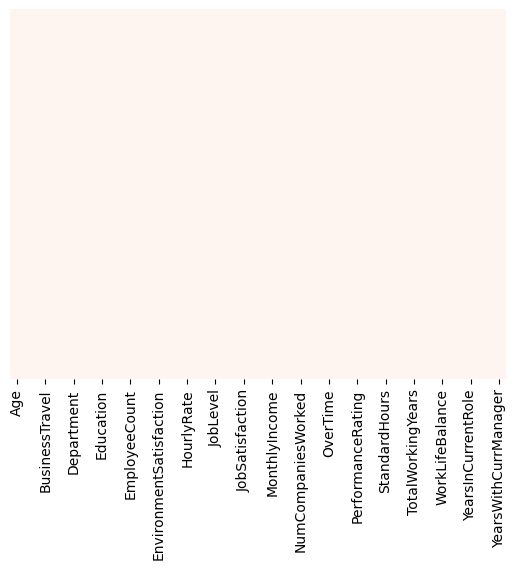

In [57]:
# Checking for missing data such as null, using Seaborn heat map
sns.heatmap(employee_dataframe.isnull(), yticklabels=False, cbar=False, cmap='Reds')

From the heatmap, we can see that there are no null values present in the dataframe. Now we can possibly plot a histogram to visualize each of the attributes.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

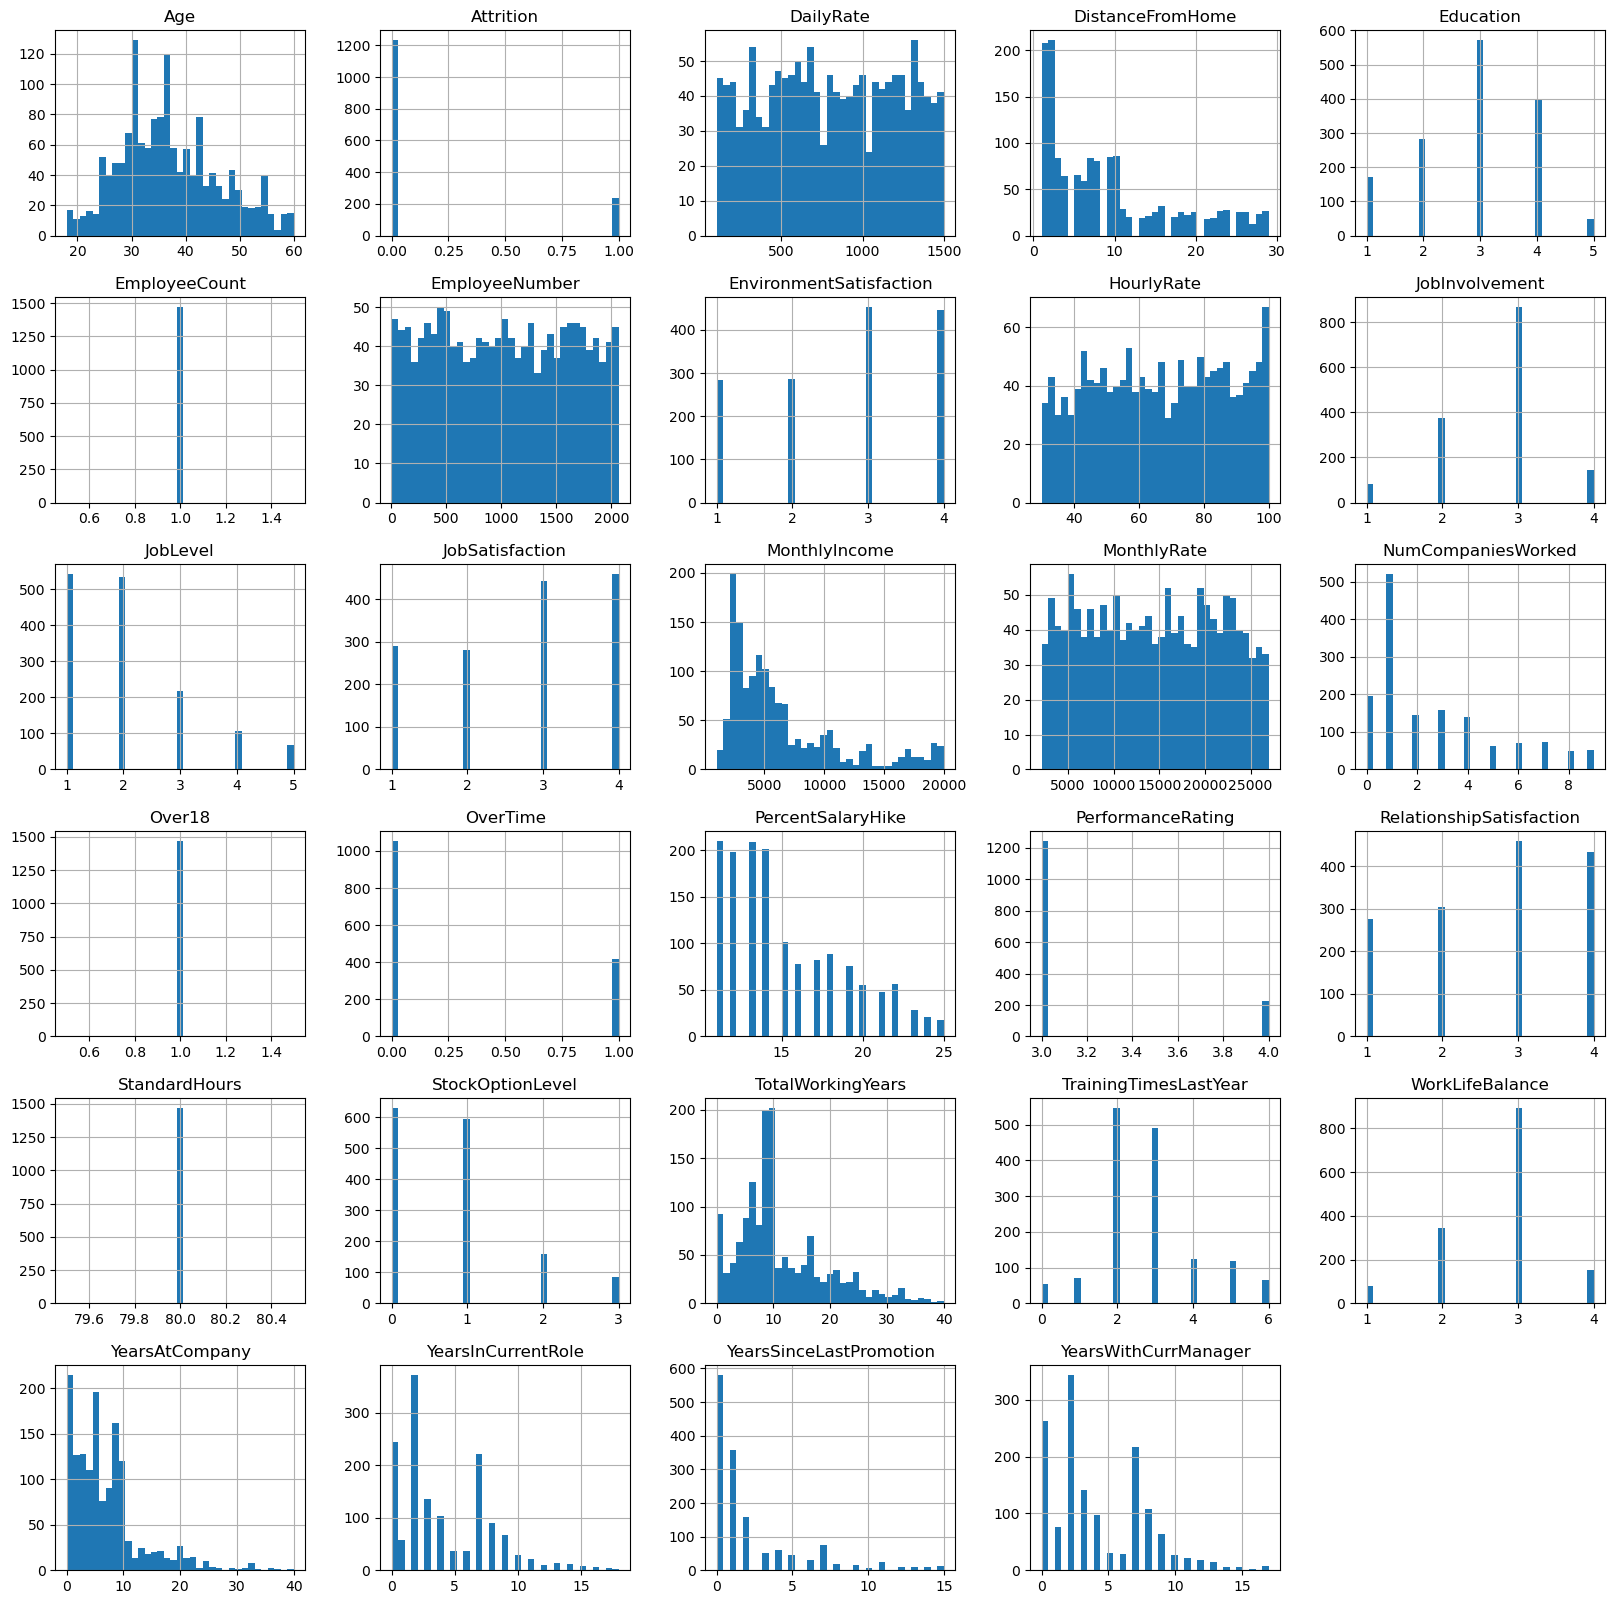

In [58]:
employee_dataframe.hist(bins=35,
                        figsize=(20,20),
                        )

By looking at the chats <br> 
Monthly income, it is very tail-heavy as lot of employee gets paid between 0-5000 per month. <br>
Salary hike, it is also very tail-heavy, a very common % increase is around 15% and 20-25% is at a low percentage.  <br>
EmployeeCount, EmployeeNumber, StandardHours, and Over18 chat does not contrubute to finding the solution as they all have one single value, so they can be dropped. <br>

Once it is completed, we can check the Attrition table to see details about employees who has left the company.


In [59]:
employee_dataframe.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

In [60]:
# Breaking down the dataframe into two: Employees who have left, and employees who have stayed
left_df = employee_dataframe[employee_dataframe['Attrition'] == 1]
stayed_df = employee_dataframe[employee_dataframe['Attrition'] == 0]

In [61]:
# Analyzing data for employees who have left
print('Total employees left: ', len(left_df))
print(len(left_df)/len(employee_dataframe) * 100, '% of the employee has left')
left_df.describe()

Total employees left:  237
16.122448979591837 % of the employee has left


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [62]:
#Analyzing data for employees who have stayed
print('Total employees stayed: ', len(stayed_df))
print(len(stayed_df)/len(employee_dataframe) * 100, '% of the employee has stayed')
stayed_df.describe()

Total employees stayed:  1233
83.87755102040816 % of the employee has stayed


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

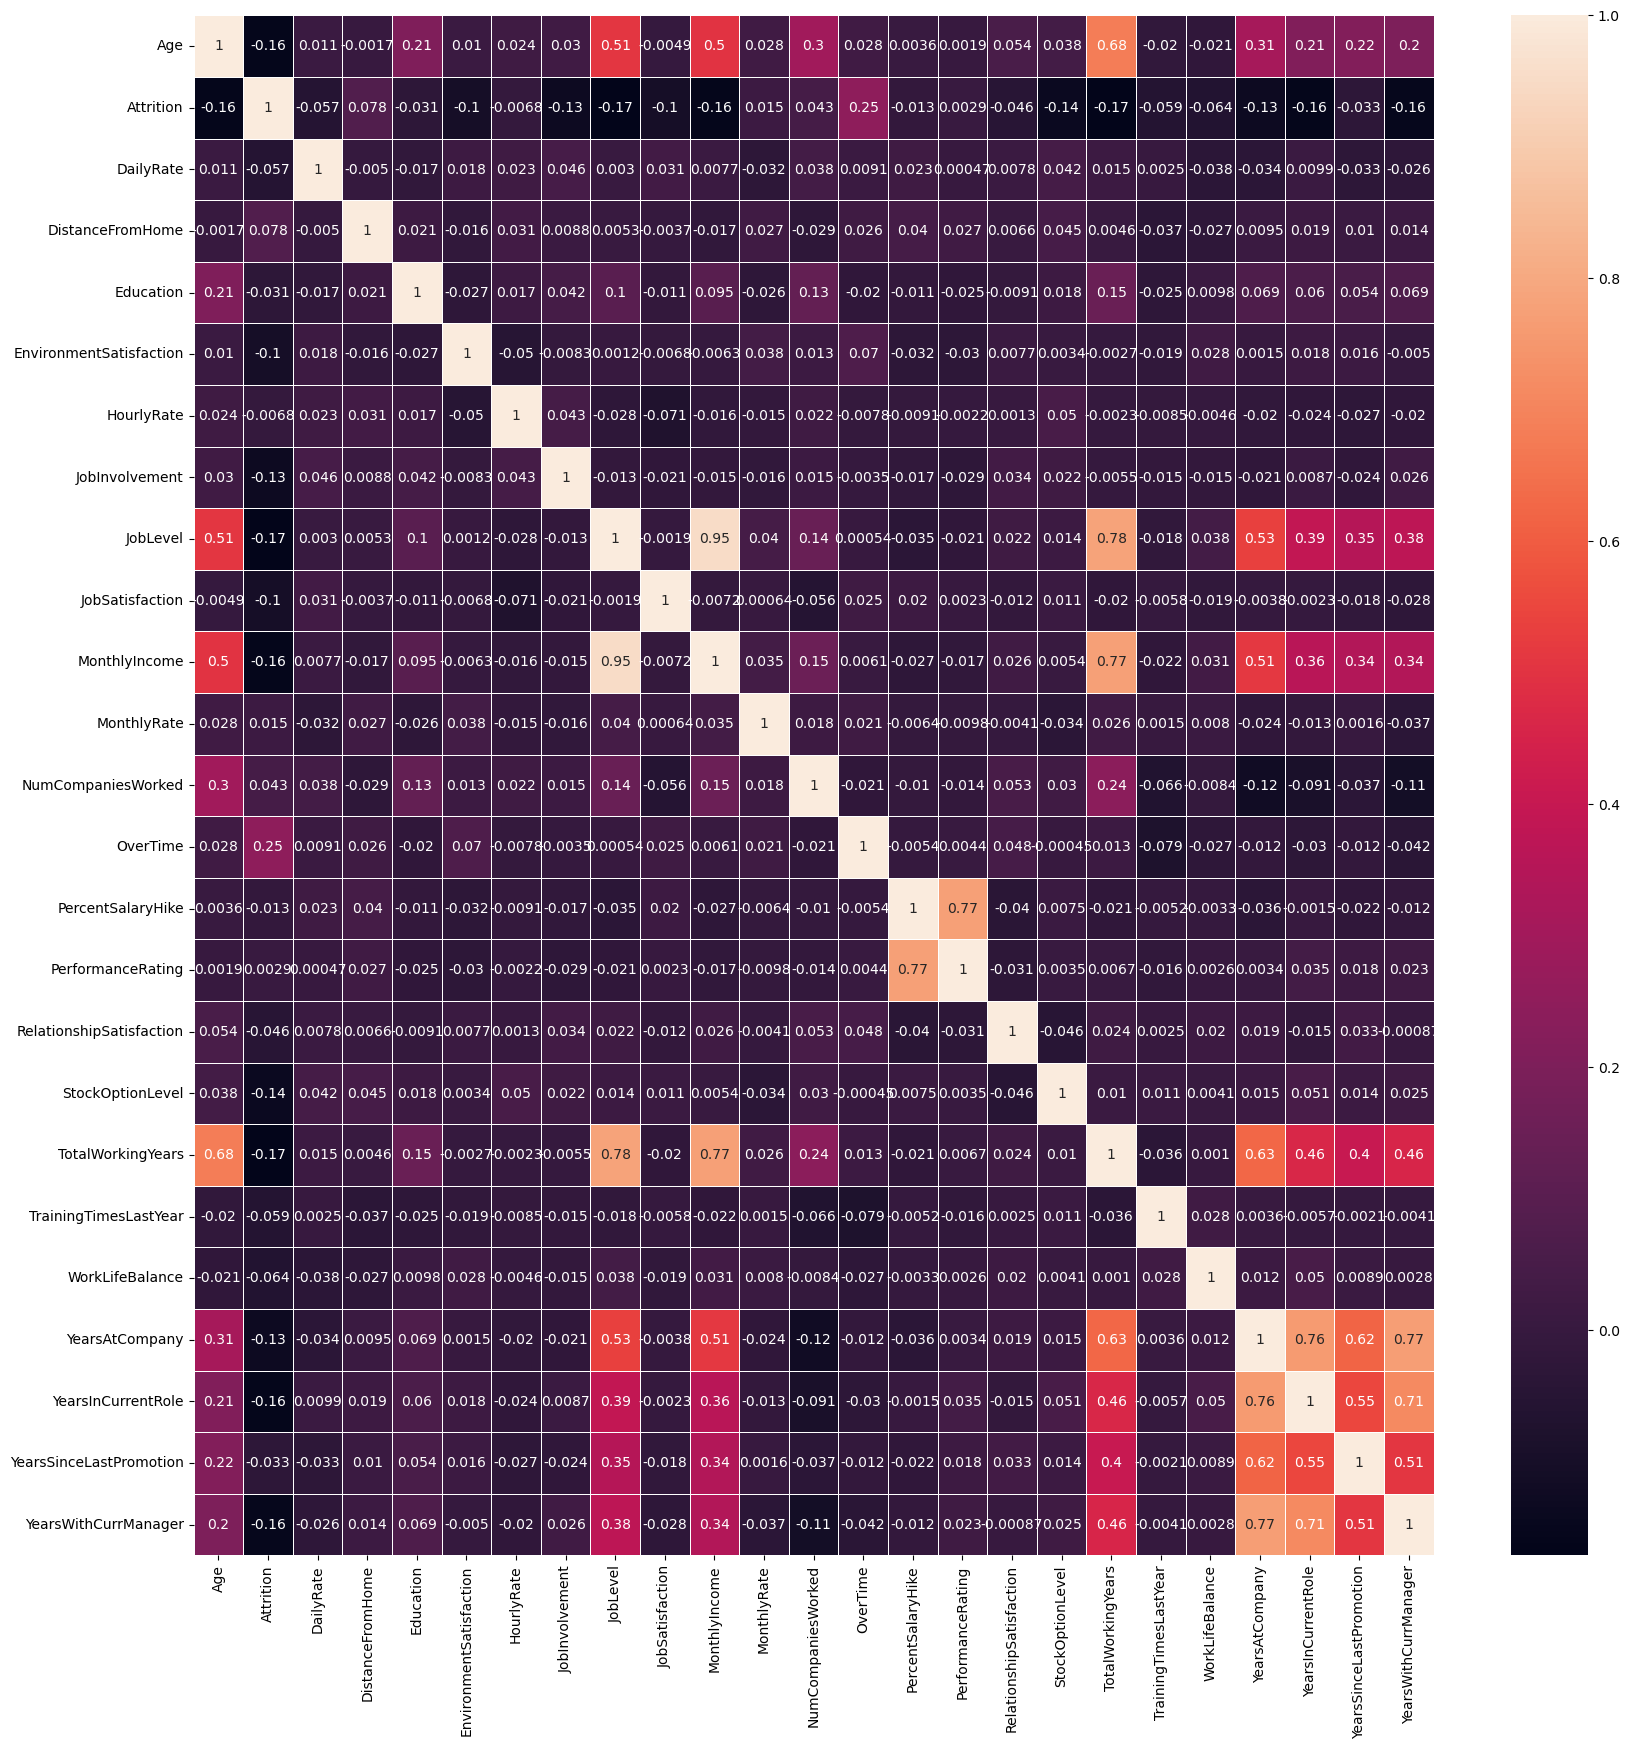

In [63]:
correlations = employee_dataframe.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations, annot=True, linewidths=0.5)

Upon analyzing both dataframes, we can say that, <br>
Age plays a factor, as the median age is lower for employees who left<br>
Workplace is further from home for those who left<br>
Average Monthly income is lower for those employee who left<br>
Average overtime worked is higher for employees who left<br>

Monthly salary should be proportional to job role and years in current company and role.<br>
We can see that the employees who left were not in the company for long, such as 1-7 years, compared to those who stayed (3-10 years).<br>
The total years of experience is also lower for employees that left<br>
This could mean that the lower average monthly salary may not be a factor as salary increases with years of experience, years worked, and current role.<br>
This is confimed by looking at the correlation chart<br>


<AxesSubplot:xlabel='Age', ylabel='count'>

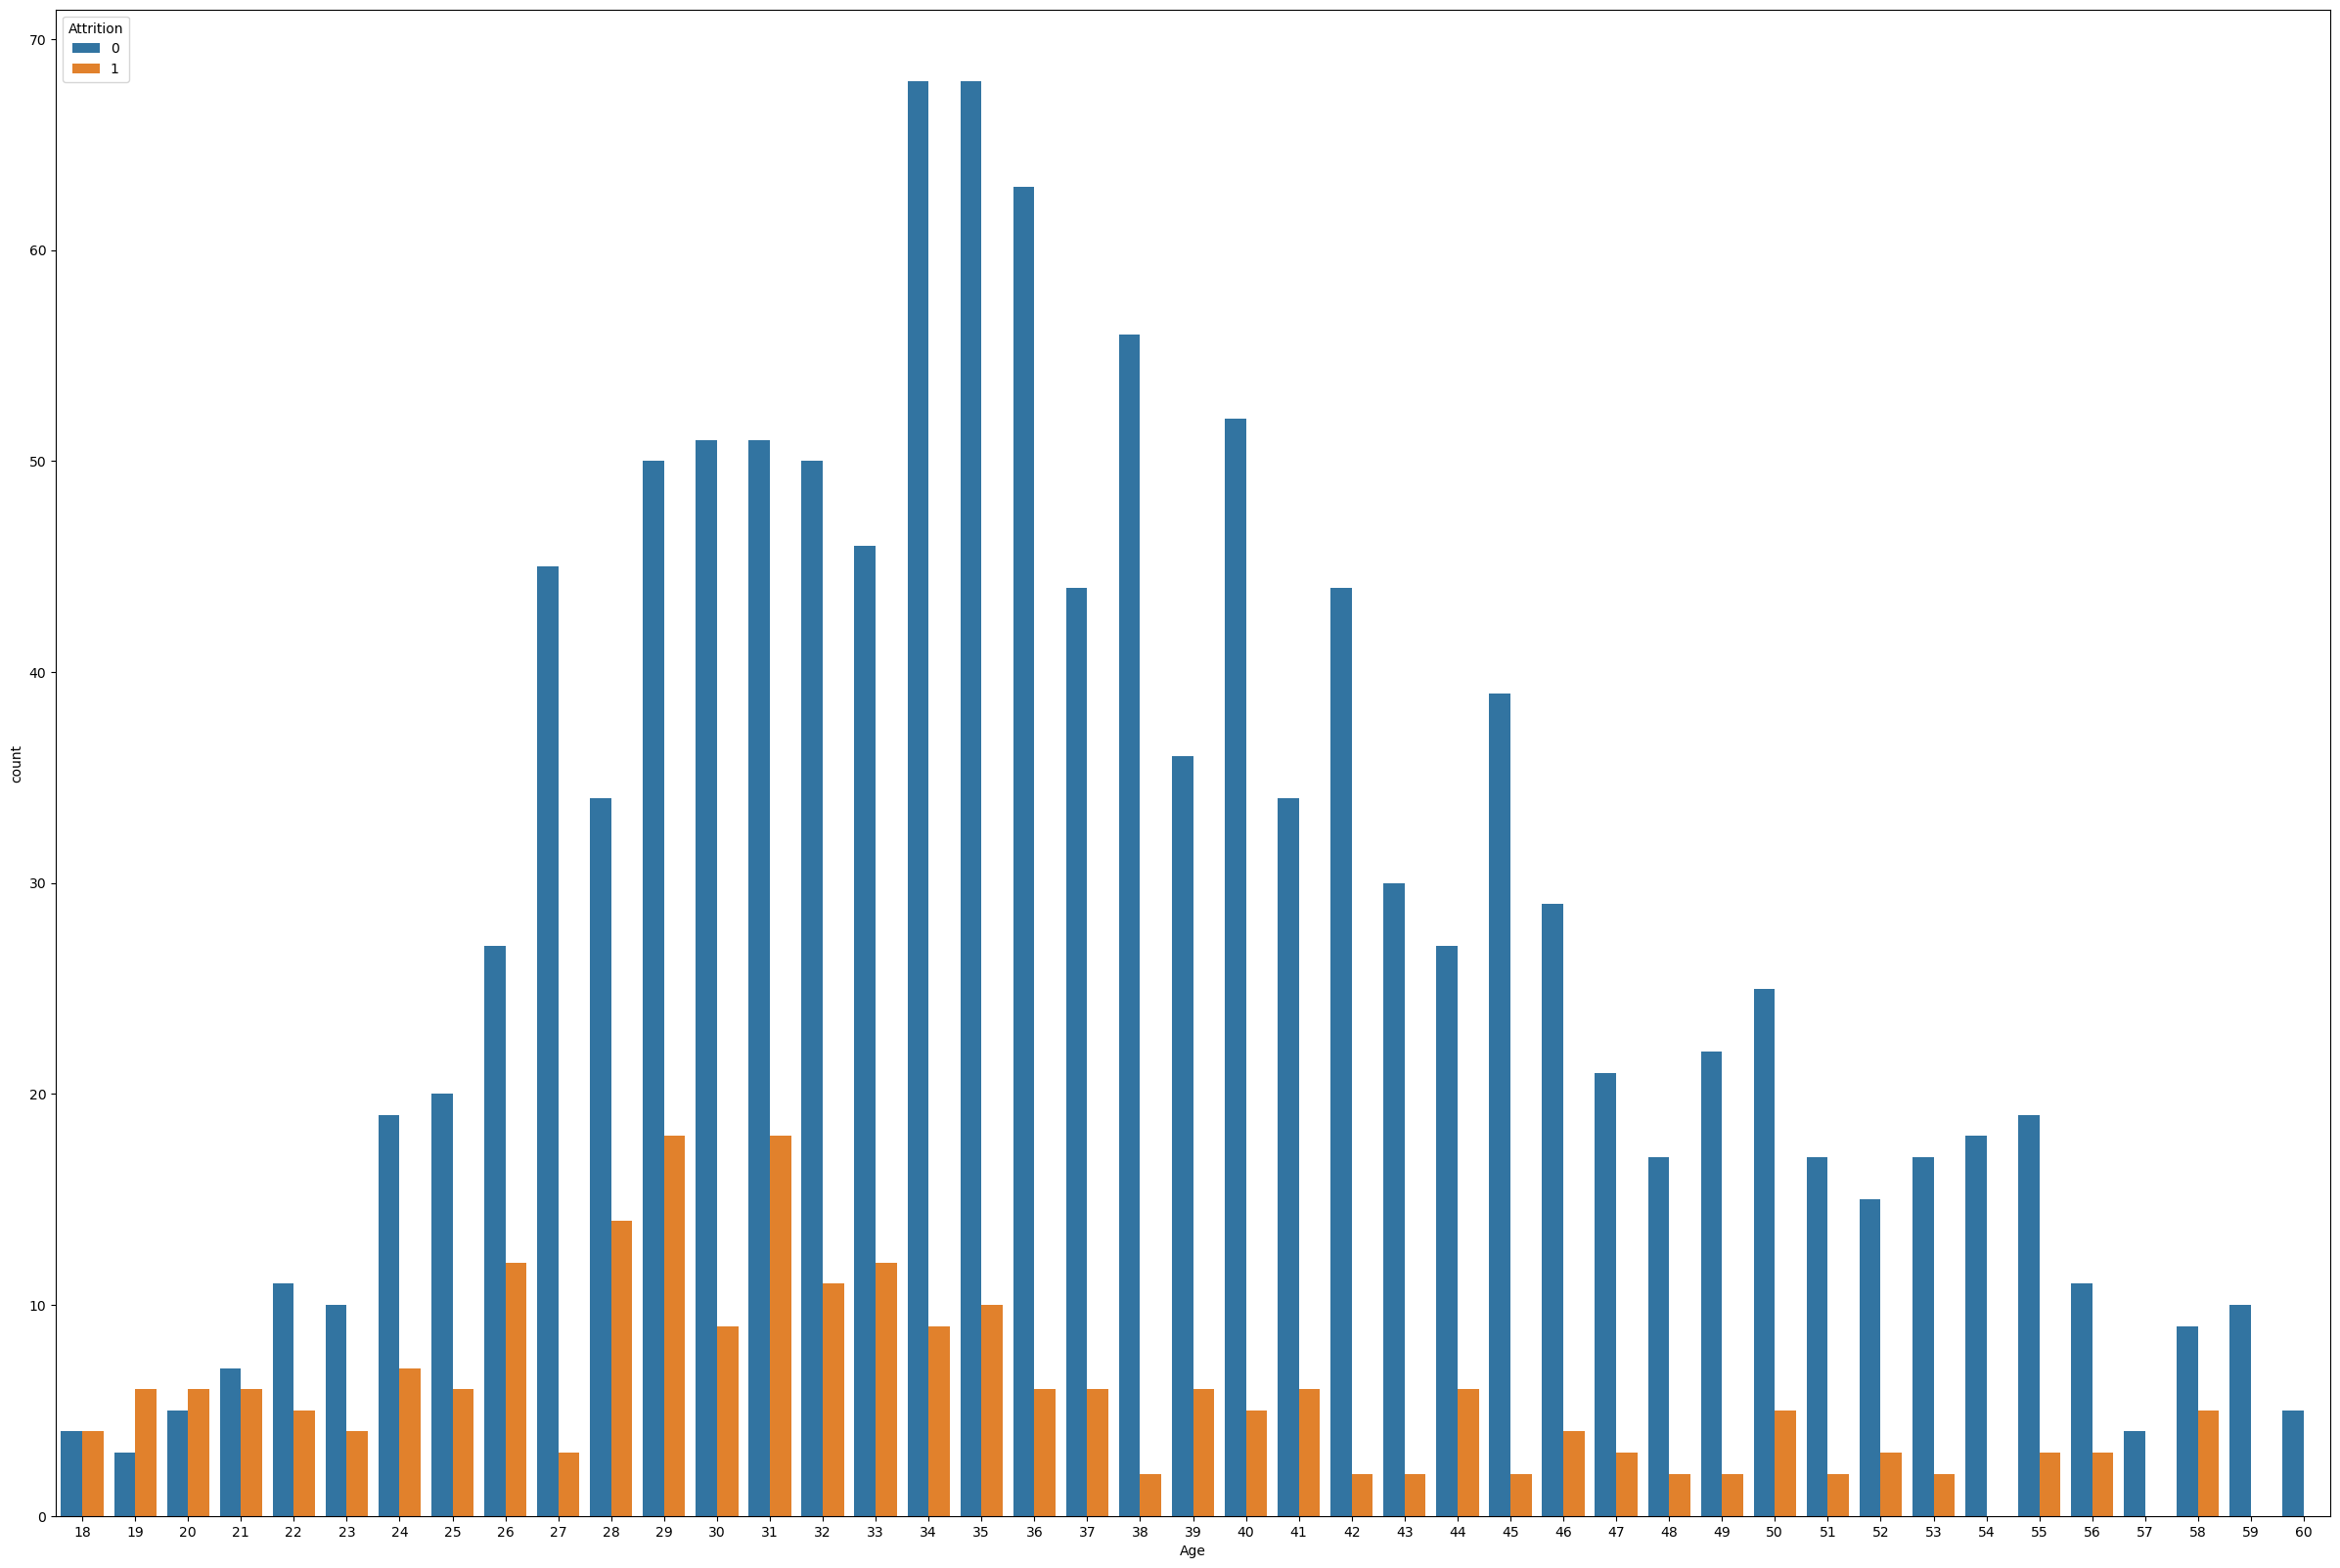

In [64]:
# Checking for relation between age and attrition
plt.figure(figsize=(30,20))
sns.countplot(x= 'Age', hue= 'Attrition', data=employee_dataframe)

By visualizing the graph, it looks like employees around the age 28-29 and 31 leaves the company the most. It is safe to say that age is a factor.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

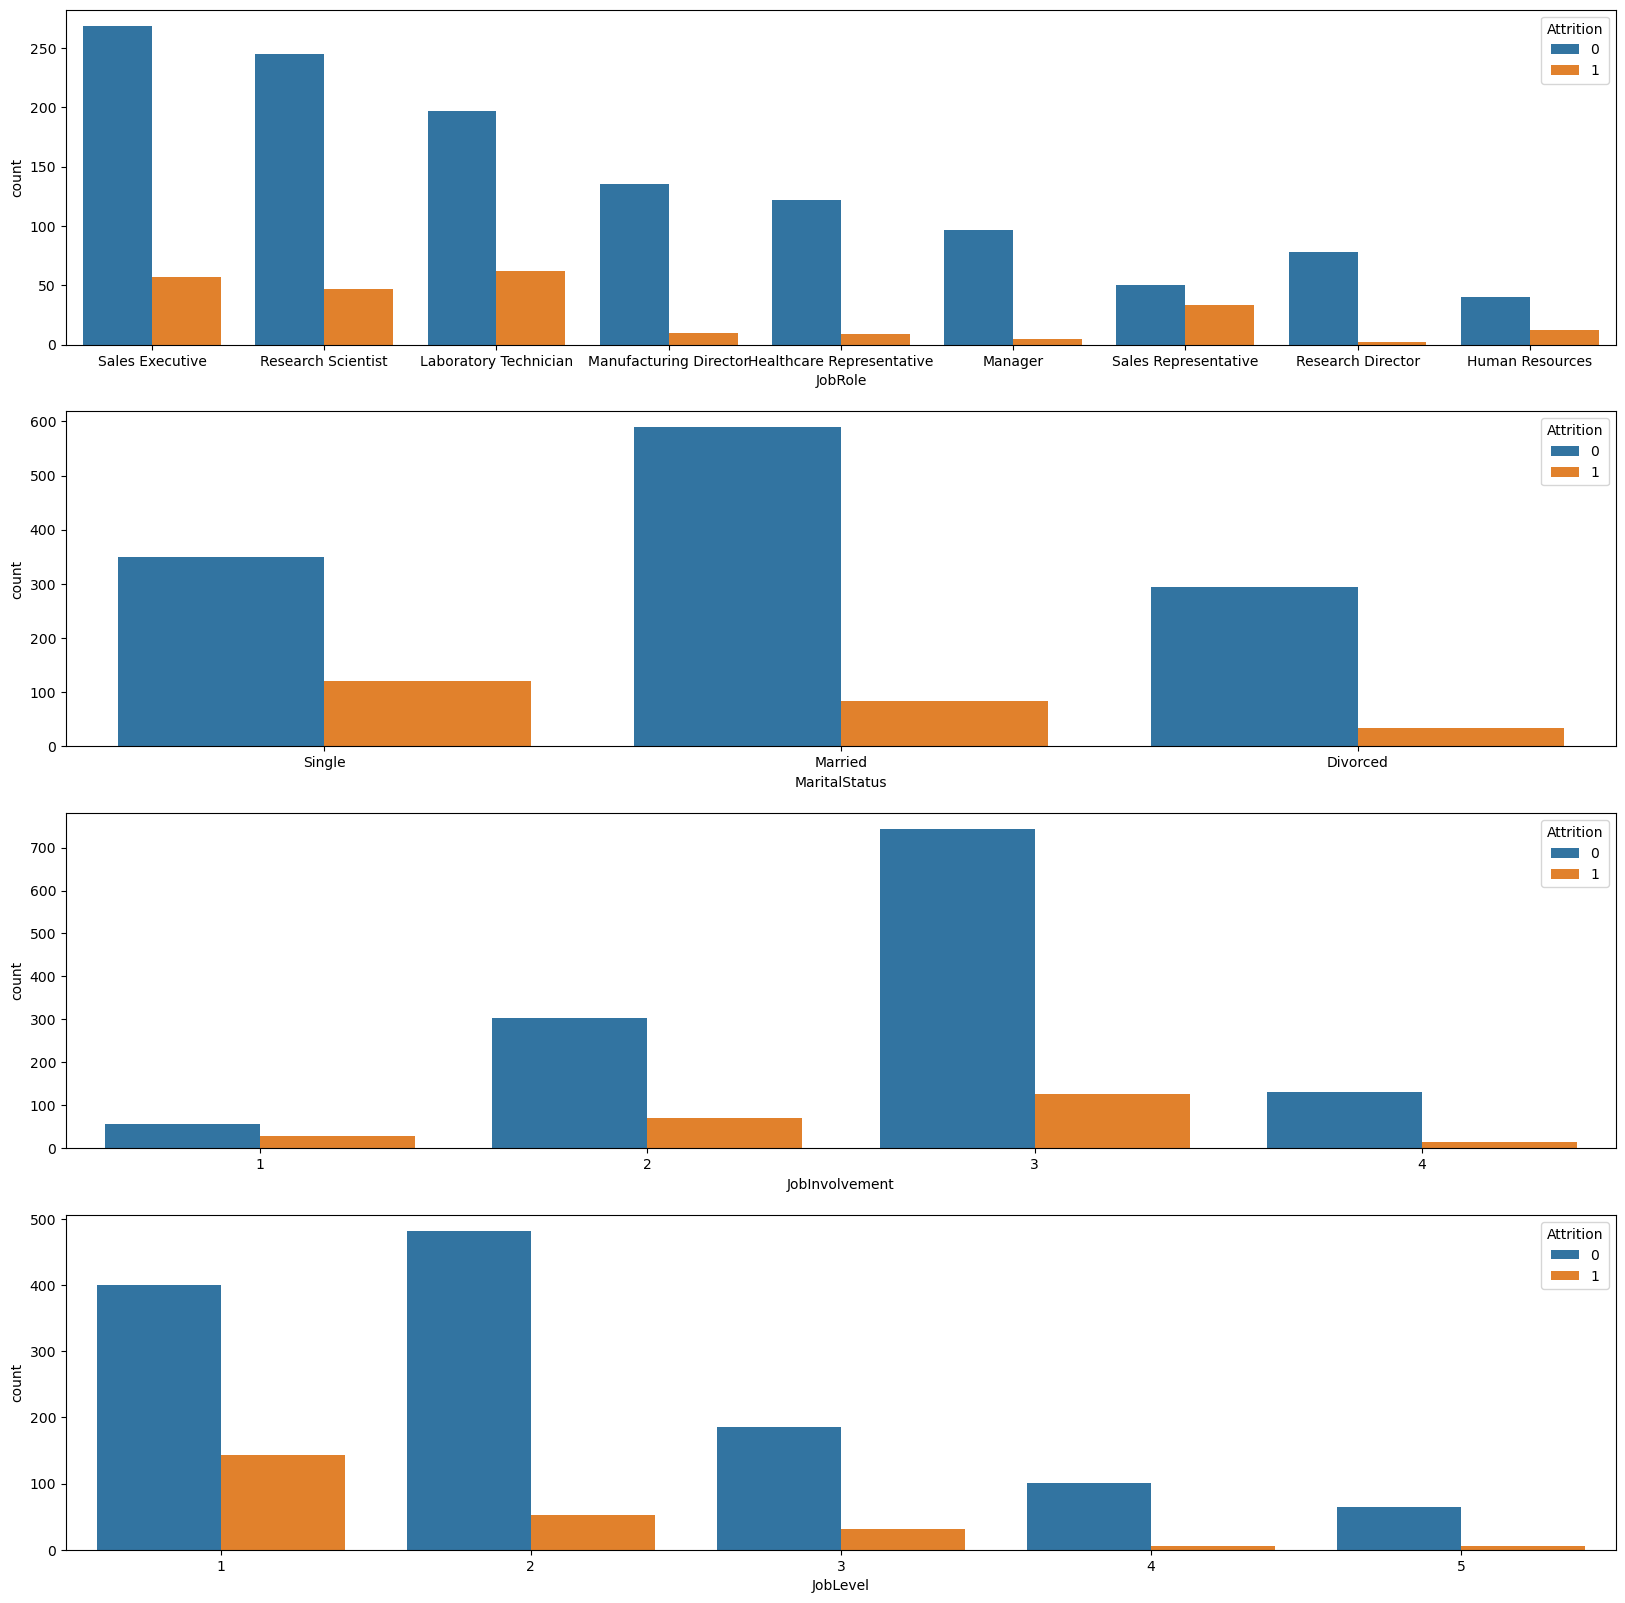

In [65]:
# Exploring the job role, marital status, job involvement and job level. 
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.countplot(x='JobRole', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,2)
sns.countplot(x='MaritalStatus', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,3)
sns.countplot(x='JobInvolvement', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,4)
sns.countplot(x='JobLevel', hue='Attrition',data=employee_dataframe)


Upon analyzing the graphs, we can say that,<br>

Proportionaly, sales represnetatives have a high turnover rate<br>
Single employees tent to leave compared to married or divorced<br>
Less experienced emplyees tend to leave<br>
Less involved employees have a high turnover rate


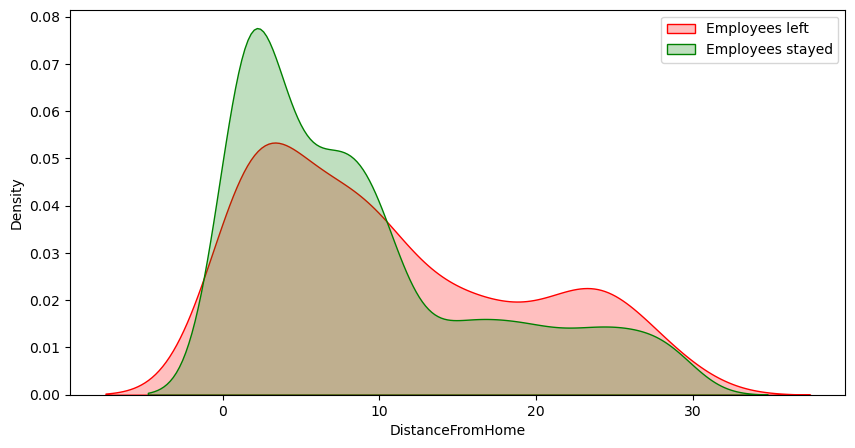

In [66]:
# Analyzing distance from home regarding attrition. 
# Developing a KDE (Karnel Density Estimate) which will be used for visualizing the probability density of a continous variable. 
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['DistanceFromHome'], shade=True, label ='Employees left', color='red')
sns.kdeplot(stayed_df['DistanceFromHome'], shade=True, label ='Employees stayed', color='green')
plt.legend()

Upon analyzing the above KDE plot, we can visualize that employees that live around 10-20km from their work location tents to leave the job more. However, this is not the only reason as there is not a big difference compared to employees that stayed.

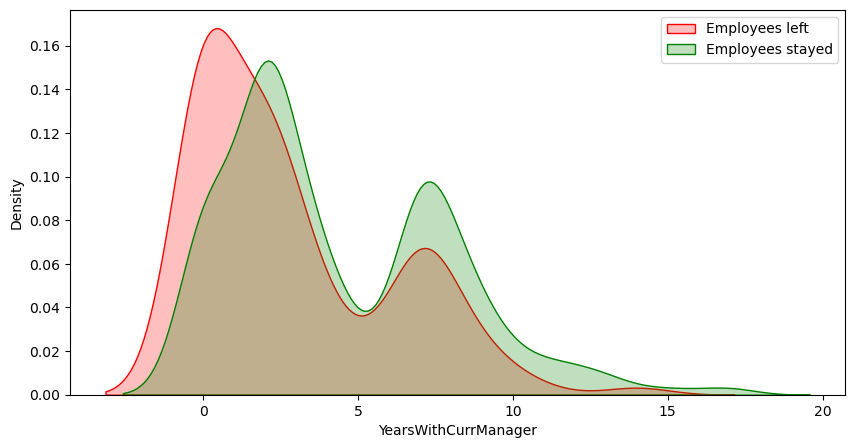

In [67]:
# Analyzing years with current manager with attrition
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['YearsWithCurrManager'], shade=True, color='red', label = 'Employees left')
sns.kdeplot(stayed_df['YearsWithCurrManager'], shade=True, color='green', label = 'Employees stayed')
plt.legend()

This graph shows that a lot of the employees who has left has been with their current manager less than 1 year. This could possibly mean that the employees may not have liked working with their manager and left early on.

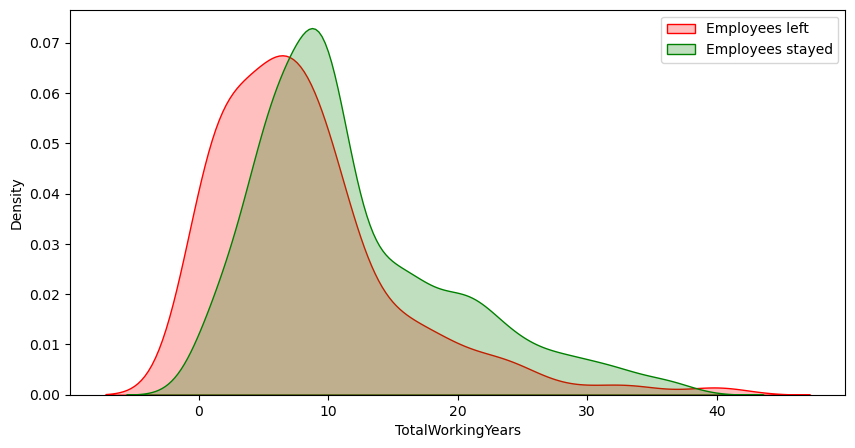

In [68]:
# Analyzing total working years with attrition
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['TotalWorkingYears'], shade=True, color='red', label = 'Employees left')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade=True, color='green', label = 'Employees stayed')
plt.legend()

Most of the employees that left, left duing 1st 5 years.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

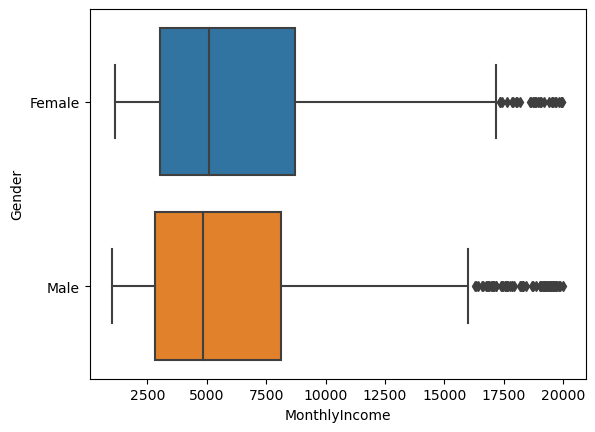

In [69]:
#Gender by monthly income
sns.boxplot(x = 'MonthlyIncome', y='Gender', data=employee_dataframe)

Average salary seems very similar to each other, so gender discrimination based on salary is not a constrain. 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

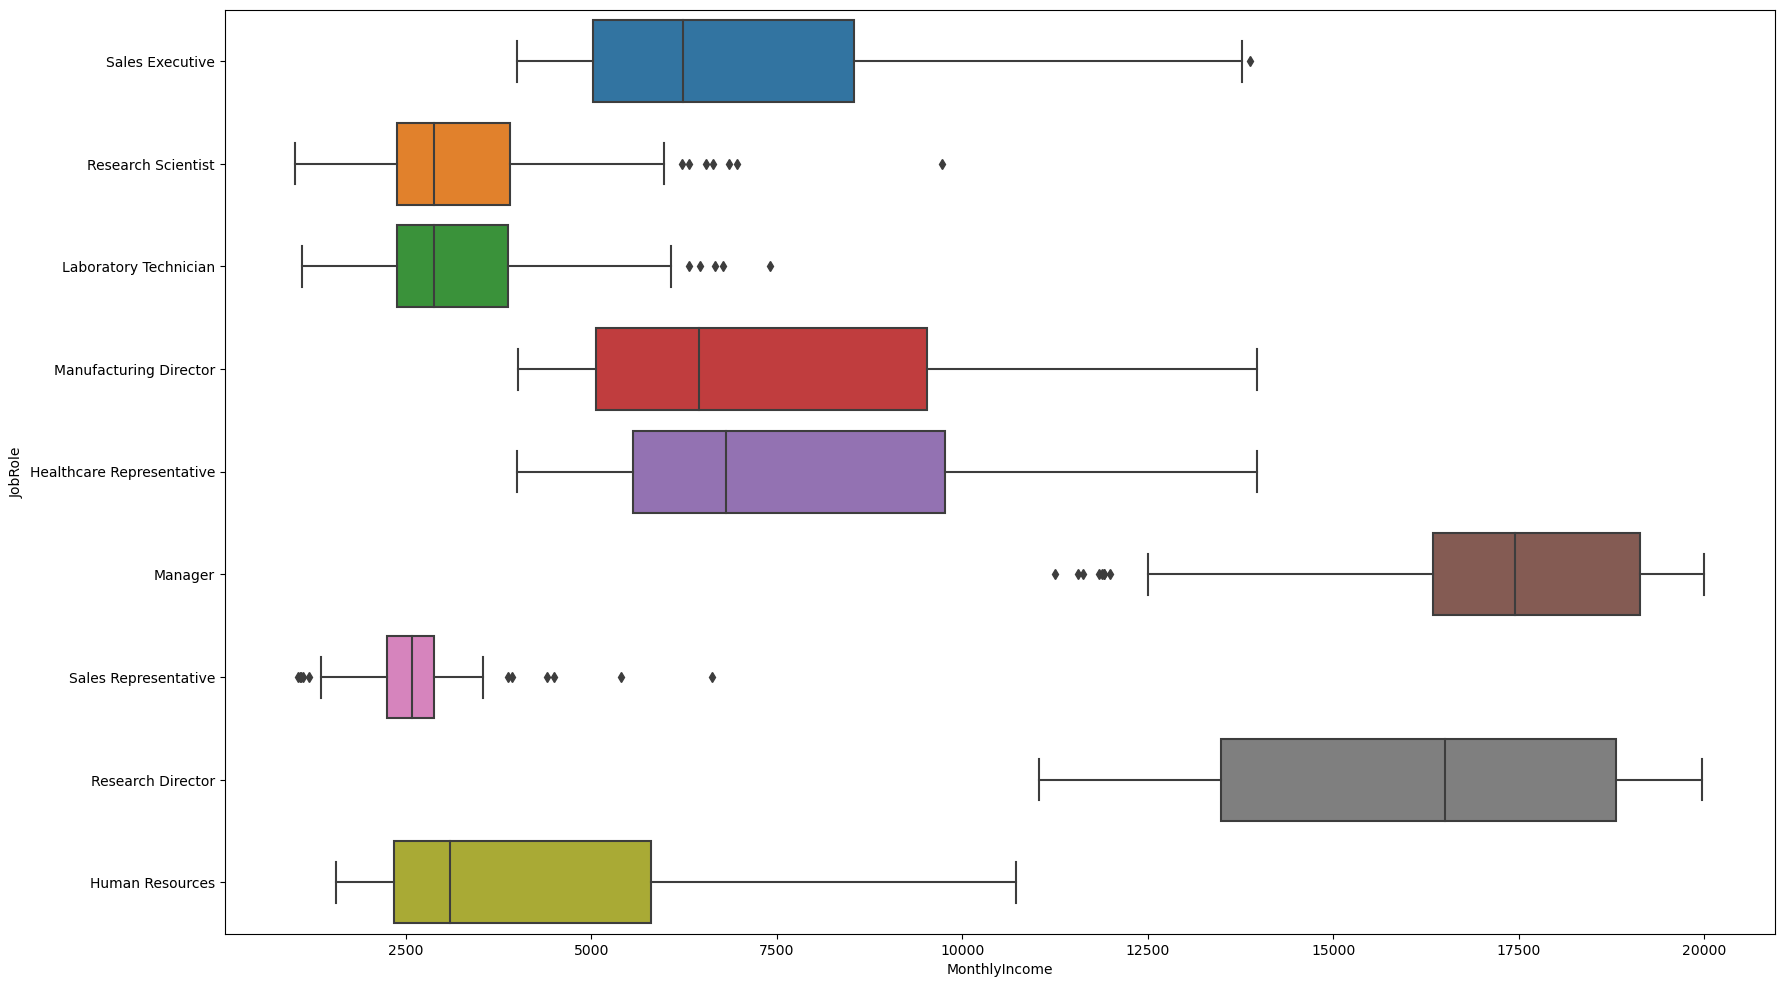

In [70]:
# job role vs monthly income
plt.figure(figsize=(20,12))
sns.boxplot(x = 'MonthlyIncome', y='JobRole', data=employee_dataframe)

Upon looking at the job role vs monthly income chat, we can say that a reason why sales representative role had the highest turnover rate is due to their monthly income. Their highest and lowest salary is already low compared to other job roles, with a few high outliers. 